## <div align='center' ><font size='5'>CQF EXAM TWO</font></div>


<center>April, 2023</center>


<center>January Cohort</center>


<center>Wei Wei</center>

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from scipy.stats import gmean
from scipy.integrate import quad 
import math 
from sympy import *
# customized class for Asian option pricing
#see more details in MC_Asian.py
from MC_Asian import Asian
from tabulate import tabulate
# Set max row and columns to 50
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

# Question 1 Asian Option
### 1.1  Stock Price Gereation
To simulate the asset price at maturity, we use the stochastic differential equation (SDE) of a geometric Brownian motion under risk neutrality as proposed by the Black-Scholes-Merton model:

$$dS_t = \mu S_t dt + \sigma S_t dt$$

where $S_t$ is the price of the stock at time $t$, $\mu$ is the drift, $\sigma$ is the volatility, and $W_t$ is the Wiener process (also known as Brownian motion). 

I utilized the following recursive formula to simulate the path of $S(t)$ using the Euler-Maruyama, Milstein scheme, and Closed Form method:


* Euler Maruyama
$$S_{i+1} = S_i + \mu S_i \Delta t + \sigma S_i \Delta \phi_i$$


* Milstein
$$S_{i+1} = S_i + \mu S_i \Delta t + \sigma S_i \Delta \phi_i + \frac{1}{2} \sigma^2 S_i \left(\Delta \phi_i^2 - \Delta t\right)$$


* Closed Form
$$S(t) = S(0) e^{(\mu-\frac{1}{2}\sigma^2)t + \sigma \phi(t)}$$
The variable $\phi_t$  is a standard normally distributed random variable,, $\Delta t$ is the time interval.

### 1. 2. Asian Option Type

Asian options refer to a category of financial options that offer a payoff that is linked to the average price of the underlying asset during a specified time interval. Various types of Asian options exist, such as:

### 1. 2.1 Type of average
To compute an Asian Option, it is crucial to establish the meaning of "average " When dealing with continuous data, calculating the average is a simple task, as it involves taking the mean of all prices within the sample period.

* Continuous arithmetic average
$$A_{ca}=\int_{0}^{T}S(\tau)d\tau $$


* Continuous geometric average
$$A_{cg}=exp^{\int_{0}^{t}In(S(\tau))d\tau}$$


To calculate the average for discrete price samples, I assume that prices are provided periodically and define a window size as the sample period. I take the average of all sampled discrete prices for $t=0$ until the maturity.


* Discrete arithmetic averages
$$A_{da}=\frac{1}{T}\sum_{T}^{i=0}S_{i} $$


* Discrete geometric average
$$A_{dg}=exp^{\frac{1}{T}\sum_{T}^{i=0}In(S_{i})} $$

### 1. 2.2 Type of Pay off

| Type               | Payoff Formula |
| :----------------: | :------------: |
| Strike Call Option |   $$max(S-A,0)$$ |
| Strike Put Option  |   $$max(A-S,0)$$ |
| Float Call Option  |   $$max(A-K,0)$$ |
| Float Put option   |   $$max(K-A,0)$$ |

The stock price is denoted by $S$, the strike price by $K$, and $A$ represents the average price of the underlying asset during the option's lifespan. There are 16 different types of Asian options that result from combining four types of payoffs and four types of averages.

### 1.3 Python Programming
### 1. 3.1 Class Asian
A **class named "Asian"** is available in the same directory as this notebook, which can be used to calculate the price of an Asian option based on the given inputs. 
The users have the option to select from the following parameters to request the option value. The four available parameters are:

* option_type=put ot call Option
* mean_type= arithmetic or geometric Option
* sampling_type=continuous or discrete Option
* strike_type=fixed or float Option

Initial parameters setting:
* Initial price=100
* T=1 year=252 days
* Volatility=0.2
* risk-free rate=5%
* Strike price=100
* Time to Expriy=1 year=252 days

### 1. 3.2 Initial Data Calculation
* Four type of average
* Calculation Results

In [2]:
#Set the parameters of options
option_type=['Put','Call']
mean_type=['Arithmetic','Geometric']
sampling_type=['Continuous','Discrete']
strike_type=['Fixed','Float']

Text(0.5, 0.98, 'Figure 1-1 Euler Updated Method')

<Figure size 432x288 with 0 Axes>

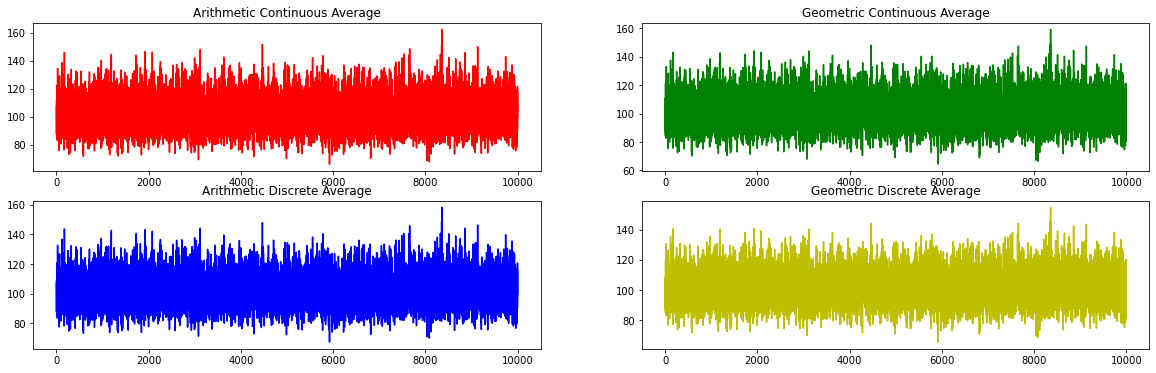

In [3]:
#Asian class already be saved in the same zip file as this notebook
'''
Starting The following data:

S0=100

T=1 year

Volatility=20%

risk-free rate=5%

Strike K=100

Time to expiry =1 year

N=100000

'''
Option=Asian(100,0.05,0.2,1,252,10000,21,100)

Option_Value_Euler=[]
Option_Head_Euler=[]
S_Euler=Option.simulate_path('Euler')
for i in option_type:
    for j in mean_type:
        for ii in sampling_type:
            for jj in strike_type:
                Option_Value_Euler.append(Option.Asian_Option_payoff(i,j,ii,jj))
                Option_Head_Euler.append(str(i)+" "+str(j)+" "+str(ii)+" "+str(jj))

ac=Option.simple_arithmetic_continuous()
gc=Option.simple_geometric_continuous()
ad=Option.arithmetic_discrete()
gd=Option.geometric_discrete()
fig=plt.figure()
figure, axes = plt.subplots(2, 2, figsize=(20,6))
axes[0, 0].plot(ac, color='r')
axes[0, 0].set_title('Arithmetic Continuous Average')

axes[0, 1].plot(gc, color='g')
axes[0, 1].set_title('Geometric Continuous Average')

axes[1, 0].plot(ad, color='b')
axes[1, 0].set_title('Arithmetic Discrete Average')

axes[1, 1].plot(gd, color='y')
axes[1, 1].set_title('Geometric Discrete Average')
fig.suptitle('Figure 1-1 Euler Updated Method', fontsize=16)

Text(0.5, 0.98, 'Figure 1-2 Milstein Updated Method')

<Figure size 432x288 with 0 Axes>

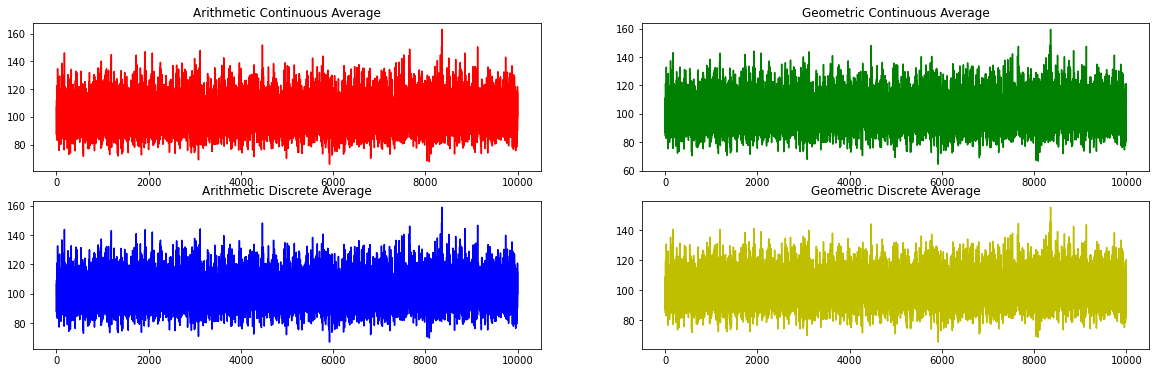

In [4]:
S_Milstein=Option.simulate_path('Milstein')

#Asian Option price based on the Milstein Scheme               
Option_Value_Milstein=[]
Option_Head_Milstein=[]
for i in option_type:
    for j in mean_type:
        for ii in sampling_type:
            for jj in strike_type:
                Option_Value_Milstein.append(Option.Asian_Option_payoff(i,j,ii,jj))
                Option_Head_Milstein.append(str(i)+" "+str(j)+" "+str(ii)+" "+str(jj))
                
ac=Option.simple_arithmetic_continuous()
gc=Option.simple_geometric_continuous()
ad=Option.arithmetic_discrete()
gd=Option.geometric_discrete()
fig=plt.figure()
figure, axes = plt.subplots(2, 2, figsize=(20,6))

axes[0, 0].plot(ac, color='r')
axes[0, 0].set_title('Arithmetic Continuous Average')

axes[0, 1].plot(gc, color='g')
axes[0, 1].set_title('Geometric Continuous Average')

axes[1, 0].plot(ad, color='b')
axes[1, 0].set_title('Arithmetic Discrete Average')

axes[1, 1].plot(gd, color='y')
axes[1, 1].set_title('Geometric Discrete Average')
fig.suptitle('Figure 1-2 Milstein Updated Method', fontsize=16)

Text(0.5, 0.98, 'Figure 1-3 Closed Form Updated Method')

<Figure size 432x288 with 0 Axes>

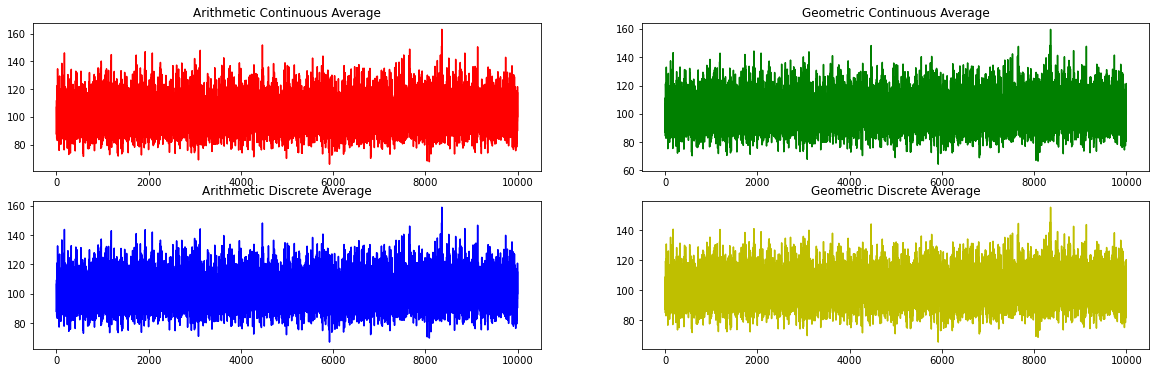

In [5]:


#Asian Option price based on the Clsed Form updateing method        
Option_Value_ClosedForm=[]
Option_Head_ClosedForm=[]
S_ClsedForm=Option.simulate_path('ClosedForm')
for i in option_type:
    for j in mean_type:
        for ii in sampling_type:
            for jj in strike_type:
                Option_Value_ClosedForm.append(Option.Asian_Option_payoff(i,j,ii,jj))
                Option_Head_ClosedForm.append(str(i)+" "+str(j)+" "+str(ii)+" "+str(jj))
                
ac=Option.simple_arithmetic_continuous()
gc=Option.simple_geometric_continuous()
ad=Option.arithmetic_discrete()
gd=Option.geometric_discrete()
fig=plt.figure()
figure, axes = plt.subplots(2, 2, figsize=(20,6))

axes[0, 0].plot(ac, color='r')
axes[0, 0].set_title('Arithmetic Continuous Average')

axes[0, 1].plot(gc, color='g')
axes[0, 1].set_title('Geometric Continuous Average')

axes[1, 0].plot(ad, color='b')
axes[1, 0].set_title('Arithmetic Discrete Average')

axes[1, 1].plot(gd, color='y')
axes[1, 1].set_title('Geometric Discrete Average')
fig.suptitle('Figure 1-3 Closed Form Updated Method', fontsize=16)

Text(0.5, 0.98, ' Figure 1-4 Monte Carlo Simulated Asset Prices')

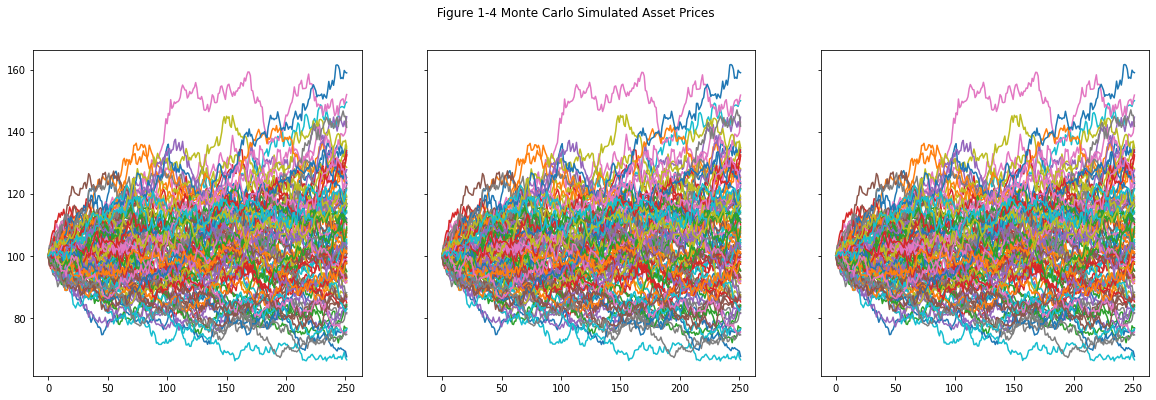

In [6]:

# visualize call and put price for range of spot prices
figure, axes = plt.subplots(1,3, figsize=(20,6), sharey=True)
title, payoff, grid = ['Euler', 'Milstein','ClosedForm'], [S_Euler[:,:100], S_Milstein[:,:100],S_ClsedForm[:,:100]], [arange(0,252), arange(0,252),arange(0,252)]

# plot payoff 
for i in range(3):
    axes[i].plot(grid[i], payoff[i])

figure.suptitle(' Figure 1-4 Monte Carlo Simulated Asset Prices')

In [7]:
#A table to show all Asian Option price based three different path generating method
table=[[Option_Head_Euler[i], Option_Value_Euler[i],Option_Value_Milstein[i],Option_Value_ClosedForm[i]] for i in range(len(Option_Value_Euler))]
print(tabulate(table, headers=[ 'Option Type','Euler','Milstein','Closed Form']))

Option Type                         Euler    Milstein    Closed Form
--------------------------------  -------  ----------  -------------
Put Arithmetic Continuous Fixed   3.38339     3.38338        3.38415
Put Arithmetic Continuous Float   3.42443     3.42282        3.4236
Put Arithmetic Discrete Fixed     3.20218     3.20209        3.20282
Put Arithmetic Discrete Float     3.60545     3.60401        3.60484
Put Geometric Continuous Fixed    3.50258     3.50246        3.50328
Put Geometric Continuous Float    3.29766     3.29638        3.29711
Put Geometric Discrete Fixed      3.32079     3.32054        3.32132
Put Geometric Discrete Float      3.47945     3.47813        3.47891
Call Arithmetic Continuous Fixed  5.62067     5.62012        5.6211
Call Arithmetic Continuous Float  5.79344     5.79172        5.79276
Call Arithmetic Discrete Fixed    5.25692     5.25626        5.25718
Call Arithmetic Discrete Float    6.157       6.15549        6.15659
Call Geometric Continuous Fixed   5.

### 1. 3.3 Varying Data
* Time T, Volatility, Strike Price, and risk-free rate will be changed in the following analysis
| Variables               | Range                 |
| ----------------------- | --------------------- |
| Strike                  | $$range(100, 200, 10)$$ |
| Time to Expiry          | $$range(1, 10, 1)$$   |
| Volatility              | $$range(0.1, 0.2, 0.01)$$   |
| Risk-Free Interest Rate | $$range(0.01, 0.1, 0.01)$$       |


Note: I will only use the **Euler-Maruyma** updated method to do the following test.

### (1) Volatility
* Change volatility from 0.1 to 0.2

In [8]:
VolPrice=[]
for p in arange(0.1,0.21,0.01):
    Option=Asian(100,0.05,p,1,252,100,21,100)

#Asian Option price based on the Euler Maruyama generating method 
    S_Euler=Option.simulate_path('Euler')
    Option_Value_Euler_Vol=[]
    Option_Head_Euler_Vol=[]
    for i in option_type:
        for j in mean_type:
            for ii in sampling_type:
                for jj in strike_type:
                    Option_Value_Euler_Vol.append(Option.Asian_Option_payoff(i,j,ii,jj))
                    Option_Head_Euler_Vol.append(str(i)+" "+str(j)+" "+str(ii)+" "+str(jj))
    
    VolPrice=VolPrice+[list(Option_Value_Euler_Vol)]

    # show the option prices under varying volatility
Vol_table=[[Option_Head_Euler_Vol[i], VolPrice[0][i], VolPrice[1][i], VolPrice[2][i], VolPrice[3][i], VolPrice[4][i], VolPrice[5][i], VolPrice[6][i], VolPrice[7][i], VolPrice[8][i], VolPrice[9][i], VolPrice[10][i]] for i in range(len(Option_Head_Euler_Vol))]
Vol=pd.DataFrame(Vol_table)
Vol.columns=['Option Type','Vol=0.10','Vol=0.11','Vol=0.12','Vol=0.13','Vol=0.14','Vol=0.15','Vol=0.16','Vol=0.17','Vol=0.18','Vol=0.19','Vol=0.20']
Vol=Vol.set_index('Option Type')
Vol

Vol=0.10  Vol=0.11  Vol=0.12  Vol=0.13  \
Option Type                                                                
Put Arithmetic Continuous Fixed   1.239061  1.448561  1.665022  1.884551   
Put Arithmetic Continuous Float   1.015497  1.191938  1.367820  1.545213   
Put Arithmetic Discrete Fixed     1.189688  1.393017  1.600743  1.808394   
Put Arithmetic Discrete Float     1.068669  1.254081  1.440469  1.626014   
Put Geometric Continuous Fixed    1.256051  1.471068  1.692631  1.918034   
Put Geometric Continuous Float    0.997509  1.169728  1.340743  1.512701   
Put Geometric Discrete Fixed      1.207716  1.416262  1.628839  1.842712   
Put Geometric Discrete Float      1.051139  1.232110  1.413815  1.594188   
Call Arithmetic Continuous Fixed  3.368404  3.547632  3.733399  3.921816   
Call Arithmetic Continuous Float  3.644801  3.832209  4.017725  4.203410   
Call Arithmetic Discrete Fixed    3.121200  3.294205  3.471259  3.647894   
Call Arithmetic Discrete Float    3.895803  4.092235  4.288235  4.481976   
Call Geometric Continuous Fixed   3.304064  3.474104  3.648890  3.825720   
Call Geometric Continuous Float   3.708143  3.906034  4.102767  4.300478   
Call Geometric Discrete Fixed     3.057650  3.221019  3.386670  3.551873   
Call Geometric Discrete Float     3.959852  4.166695  4.374266  4.580489   

                                  Vol=0.14  Vol=0.15  Vol=0.16  Vol=0.17  \
Option Type                                                                
Put Arithmetic Continuous Fixed   2.105645  2.326434  2.547137  2.770788   
Put Arithmetic Continuous Float   1.721908  1.899816  2.077116  2.253691   
Put Arithmetic Discrete Fixed     2.018175  2.228713  2.440207  2.653335   
Put Arithmetic Discrete Float     1.813276  2.002157  2.190323  2.383251   
Put Geometric Continuous Fixed    2.144833  2.371796  2.601267  2.832341   
Put Geometric Continuous Float    1.683649  1.854212  2.024658  2.193885   
Put Geometric Discrete Fixed      2.058795  2.276005  2.496341  2.718151   
Put Geometric Discrete Float      1.774104  1.954112  2.135094  2.317255   
Call Arithmetic Continuous Fixed  4.111383  4.300233  4.488587  4.679483   
Call Arithmetic Continuous Float  4.387042  4.570526  4.752029  4.931427   
Call Arithmetic Discrete Fixed    3.826316  4.005159  4.184622  4.365388   
Call Arithmetic Discrete Float    4.676007  4.870221  5.062272  5.257629   
Call Geometric Continuous Fixed   4.002152  4.176959  4.352490  4.527841   
Call Geometric Continuous Float   4.497202  4.693557  4.889799  5.084816   
Call Geometric Discrete Fixed     3.717544  3.882604  4.049056  4.215251   
Call Geometric Discrete Float     4.786228  4.992022  5.198744  5.406587   

                                  Vol=0.18  Vol=0.19  Vol=0.20  
Option Type                                                     
Put Arithmetic Continuous Fixed   2.994220  3.217804  3.442297  
Put Arithmetic Continuous Float   2.430875  2.609229  2.789126  
Put Arithmetic Discrete Fixed     2.868034  3.082547  3.297524  
Put Arithmetic Discrete Float     2.576288  2.768666  2.961678  
Put Geometric Continuous Fixed    3.065506  3.300432  3.535842  
Put Geometric Continuous Float    2.362163  2.530881  2.699405  
Put Geometric Discrete Fixed      2.941311  3.164763  3.389769  
Put Geometric Discrete Float      2.501698  2.684946  2.866979  
Call Arithmetic Continuous Fixed  4.869758  5.059784  5.250322  
Call Arithmetic Continuous Float  5.110042  5.288427  5.466945  
Call Arithmetic Discrete Fixed    4.547396  4.728895  4.910538  
Call Arithmetic Discrete Float    5.451630  5.643495  5.834509  
Call Geometric Continuous Fixed   4.703505  4.879157  5.053524  
Call Geometric Continuous Float   5.278868  5.473333  5.667568  
Call Geometric Discrete Fixed     4.381069  4.545458  4.709682  
Call Geometric Discrete Float     5.616645  5.825429  6.032911

Text(0.5, 0.98, 'Figure 1-5 Asian options (varying Volatility)')

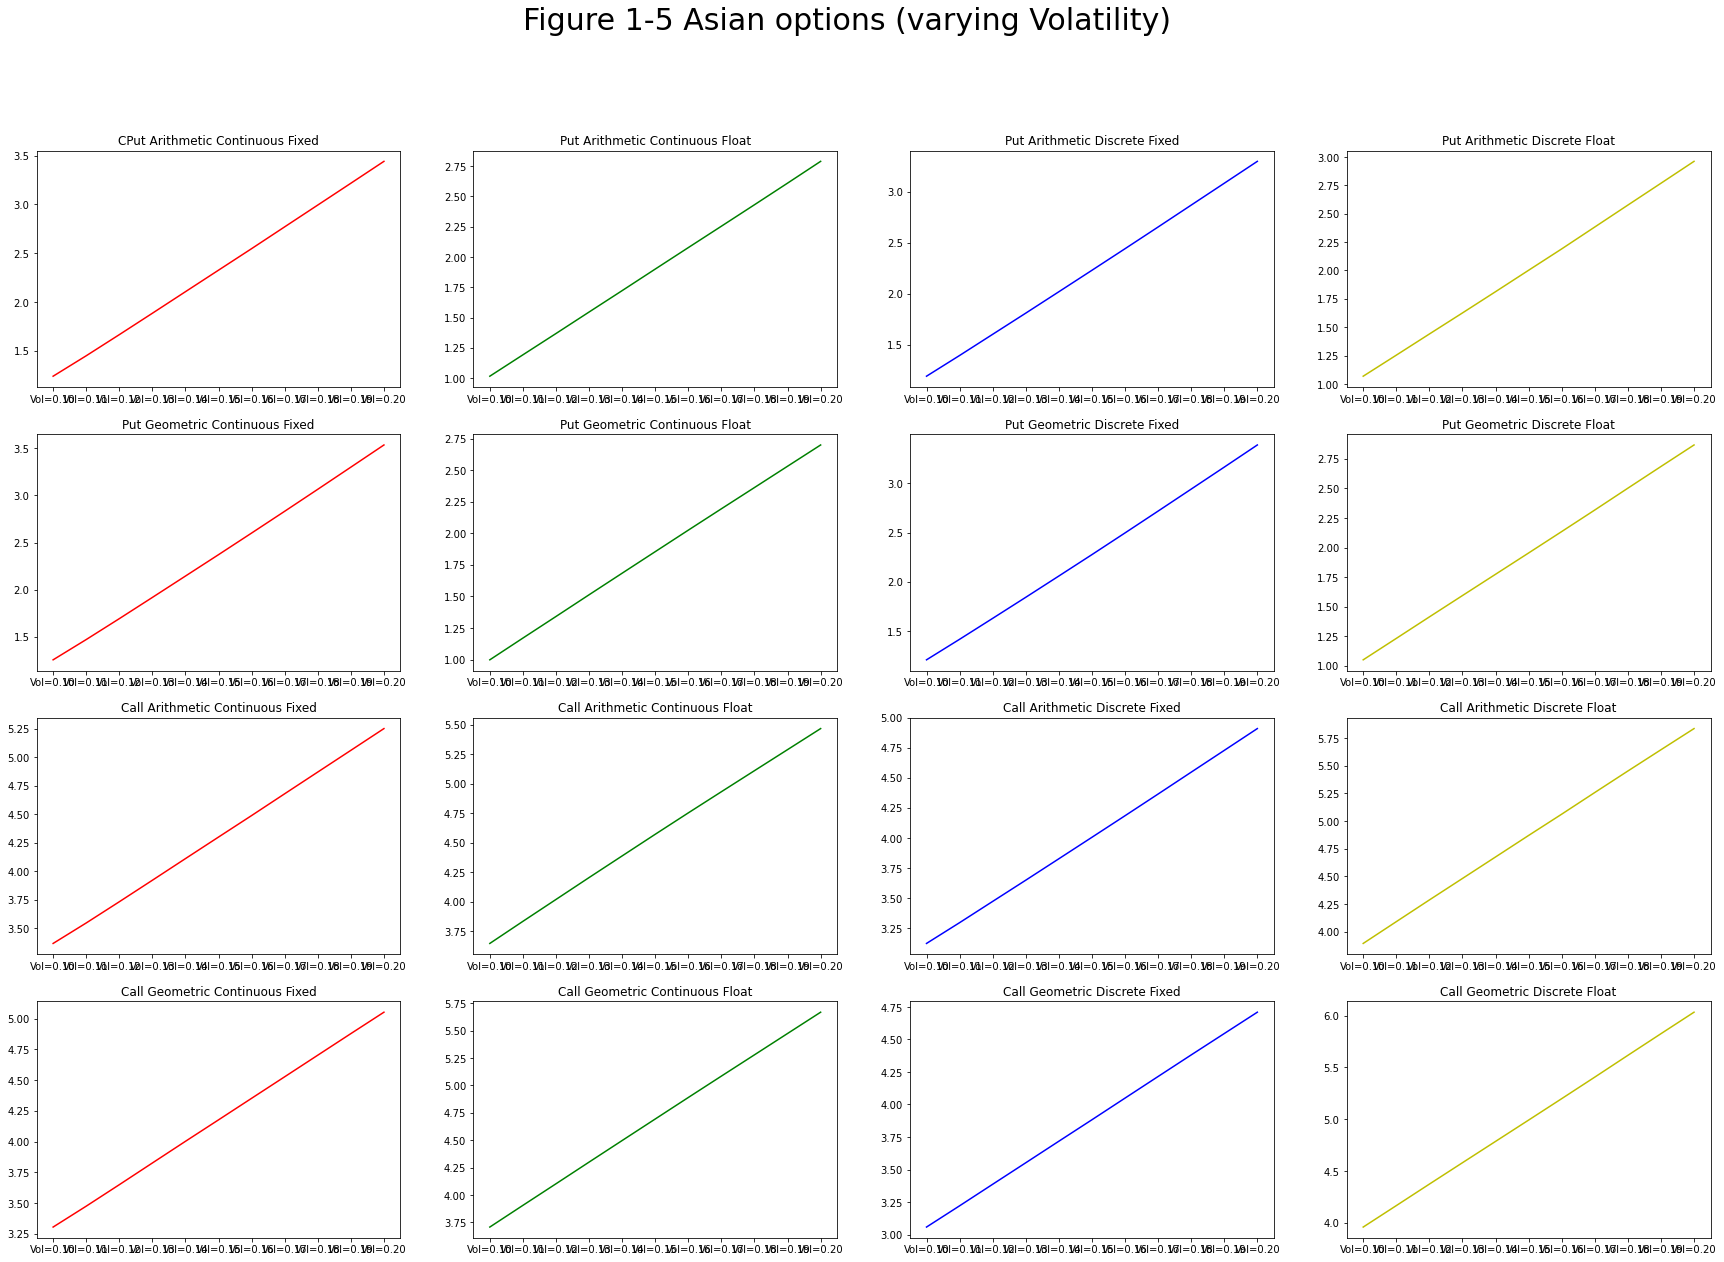

In [9]:
figure, axes = plt.subplots(4, 4, figsize=(30,20))

axes[0, 0].plot(Vol.iloc[0,:], color='r')
axes[0, 0].set_title('CPut Arithmetic Continuous Fixed')

axes[0, 1].plot(Vol.iloc[1,:], color='g')
axes[0, 1].set_title('Put Arithmetic Continuous Float')

axes[0, 2].plot(Vol.iloc[2,:], color='b')
axes[0, 2].set_title('Put Arithmetic Discrete Fixed')

axes[0, 3].plot(Vol.iloc[3,:], color='y')
axes[0, 3].set_title('Put Arithmetic Discrete Float')

axes[1, 0].plot(Vol.iloc[4,:], color='r')
axes[1, 0].set_title('Put Geometric Continuous Fixed')

axes[1, 1].plot(Vol.iloc[5,:], color='g')
axes[1, 1].set_title('Put Geometric Continuous Float')

axes[1, 2].plot(Vol.iloc[6,:], color='b')
axes[1, 2].set_title('Put Geometric Discrete Fixed')

axes[1, 3].plot(Vol.iloc[7,:], color='y')
axes[1, 3].set_title('Put Geometric Discrete Float')

axes[2, 0].plot(Vol.iloc[8,:], color='r')
axes[2, 0].set_title('Call Arithmetic Continuous Fixed')

axes[2, 1].plot(Vol.iloc[9,:], color='g')
axes[2, 1].set_title('Call Arithmetic Continuous Float')

axes[2, 2].plot(Vol.iloc[10,:], color='b')
axes[2, 2].set_title('Call Arithmetic Discrete Fixed')

axes[2, 3].plot(Vol.iloc[11,:], color='y')
axes[2, 3].set_title('Call Arithmetic Discrete Float')

axes[3, 0].plot(Vol.iloc[12,:], color='r')
axes[3, 0].set_title('Call Geometric Continuous Fixed')

axes[3, 1].plot(Vol.iloc[13,:], color='g')
axes[3, 1].set_title('Call Geometric Continuous Float')

axes[3, 2].plot(Vol.iloc[14,:], color='b')
axes[3, 2].set_title('Call Geometric Discrete Fixed')

axes[3, 3].plot(Vol.iloc[15,:], color='y')
axes[3, 3].set_title('Call Geometric Discrete Float')

plt.suptitle('Figure 1-5 Asian options (varying Volatility)', fontsize = 30)

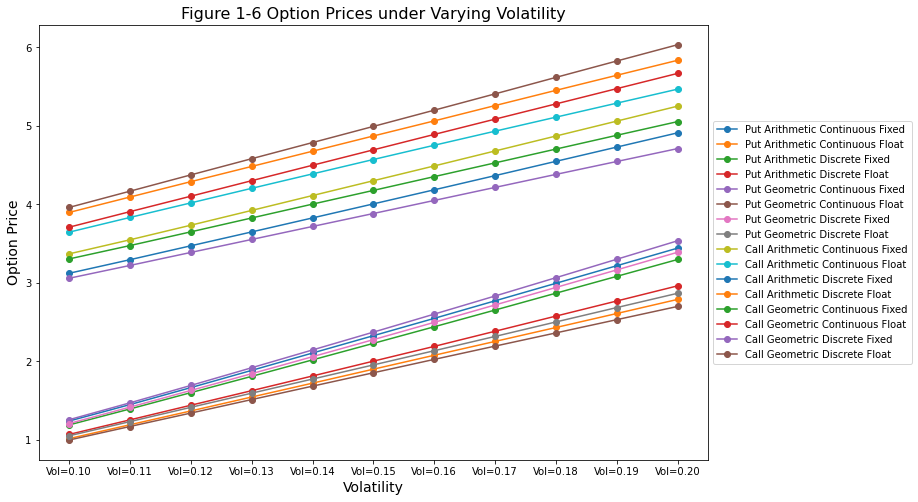

In [10]:
Vol=Vol.reset_index()
fig, ax = plt.subplots(figsize=(12, 8)) # set figure size

# plot the data
for i in range(len(Option_Head_Euler)):
    ax.plot(Vol.columns[1:], Vol.iloc[i,1:], '-o', label=Vol.iloc[i,0])

# set plot title and axis labels
ax.set_title('Figure 1-6 Option Prices under Varying Volatility', fontsize=16)
ax.set_xlabel('Volatility', fontsize=14)
ax.set_ylabel('Option Price', fontsize=14)

# move the legend outside the figure
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### 3.3.2 Risk-free rate
* Change volatility from 0.01 to 0.1

In [11]:
RfPrice=[]
for r in arange(0.01,0.11,0.01):
    Option=Asian(100,r,0.2,1,252,100,21,100)

#Asian Option price based on the Euler Maruyama generating method 
    S_Euler=Option.simulate_path('Euler')
    Option_Value_Euler_rf=[]
    Option_Head_Euler_rf=[]
    for i in option_type:
        for j in mean_type:
            for ii in sampling_type:
                for jj in strike_type:
                    Option_Value_Euler_rf.append(Option.Asian_Option_payoff(i,j,ii,jj))
                    Option_Head_Euler_rf.append(str(i)+" "+str(j)+" "+str(ii)+" "+str(jj))
    
    RfPrice=RfPrice+[list(Option_Value_Euler_rf)]

    # show the option prices under varying volatility
Rf_table=[[Option_Head_Euler_rf[i], RfPrice[0][i], RfPrice[1][i], RfPrice[2][i], RfPrice[3][i], RfPrice[4][i], RfPrice[5][i], RfPrice[6][i], RfPrice[7][i], RfPrice[8][i], RfPrice[9][i]] for i in range(len(Option_Head_Euler_rf))]
Rf=pd.DataFrame(Rf_table)
Rf.columns=['Option Type','rf=0.01','rf=0.02','rf=0.03','rf=0.04','rf=0.05','rf=0.06','rf=0.07','rf=0.08','rf=0.09','rf=0.10']
Rf=Rf.set_index('Option Type')
Rf

rf=0.01   rf=0.02   rf=0.03   rf=0.04  \
Option Type                                                                
Put Arithmetic Continuous Fixed   4.511428  4.221656  3.942325  3.679290   
Put Arithmetic Continuous Float   3.586273  3.376713  3.174460  2.975675   
Put Arithmetic Discrete Fixed     4.258163  3.995473  3.746594  3.518565   
Put Arithmetic Discrete Float     3.807078  3.580595  3.361033  3.153974   
Put Geometric Continuous Fixed    4.634722  4.338465  4.052019  3.782501   
Put Geometric Continuous Float    3.466208  3.264352  3.067583  2.876737   
Put Geometric Discrete Fixed      4.385022  4.113499  3.850691  3.614822   
Put Geometric Discrete Float      3.681934  3.462693  3.249423  3.052498   
Call Arithmetic Continuous Fixed  4.390881  4.592996  4.799008  5.014844   
Call Arithmetic Continuous Float  4.326794  4.606478  4.890174  5.174065   
Call Arithmetic Discrete Fixed    4.096443  4.286582  4.484389  4.696972   
Call Arithmetic Discrete Float    4.588772  4.890591  5.195635  5.509511   
Call Geometric Continuous Fixed   4.230491  4.425651  4.623273  4.830559   
Call Geometric Continuous Float   4.490413  4.778271  5.068726  5.362624   
Call Geometric Discrete Fixed     3.935306  4.116524  4.299513  4.502580   
Call Geometric Discrete Float     4.751624  5.060774  5.372998  5.698685   

                                   rf=0.05   rf=0.06   rf=0.07   rf=0.08  \
Option Type                                                                
Put Arithmetic Continuous Fixed   3.442297  3.218507  3.003840  2.797118   
Put Arithmetic Continuous Float   2.789126  2.623290  2.467624  2.314401   
Put Arithmetic Discrete Fixed     3.297524  3.083068  2.878324  2.683181   
Put Arithmetic Discrete Float     2.961678  2.775744  2.597949  2.431287   
Put Geometric Continuous Fixed    3.535842  3.303078  3.081455  2.872014   
Put Geometric Continuous Float    2.699405  2.541016  2.388724  2.239996   
Put Geometric Discrete Fixed      3.389769  3.171040  2.959743  2.760405   
Put Geometric Discrete Float      2.866979  2.685549  2.514816  2.355317   
Call Arithmetic Continuous Fixed  5.250322  5.492676  5.737897  5.984876   
Call Arithmetic Continuous Float  5.466945  5.777313  6.094652  6.411257   
Call Arithmetic Discrete Fixed    4.910538  5.124750  5.342804  5.564653   
Call Arithmetic Discrete Float    5.834509  6.162256  6.494555  6.834428   
Call Geometric Continuous Fixed   5.053524  5.283288  5.517180  5.756324   
Call Geometric Continuous Float   5.667568  5.988999  6.314084  6.640300   
Call Geometric Discrete Fixed     4.709682  4.916408  5.123946  5.336902   
Call Geometric Discrete Float     6.032911  6.368374  6.711698  7.063434   

                                   rf=0.09   rf=0.10  
Option Type                                           
Put Arithmetic Continuous Fixed   2.595528  2.406457  
Put Arithmetic Continuous Float   2.165789  2.021132  
Put Arithmetic Discrete Fixed     2.497821  2.315634  
Put Arithmetic Discrete Float     2.272861  2.118953  
Put Geometric Continuous Fixed    2.666672  2.472786  
Put Geometric Continuous Float    2.093711  1.952056  
Put Geometric Discrete Fixed      2.570186  2.385773  
Put Geometric Discrete Float      2.202787  2.051091  
Call Arithmetic Continuous Fixed  6.230870  6.483335  
Call Arithmetic Continuous Float  6.729319  7.048206  
Call Arithmetic Discrete Fixed    5.790548  6.013941  
Call Arithmetic Discrete Float    7.179006  7.524598  
Call Geometric Continuous Fixed   5.992716  6.233794  
Call Geometric Continuous Float   6.966539  7.295000  
Call Geometric Discrete Fixed     5.552514  5.767544  
Call Geometric Discrete Float     7.419332  7.773272

Text(0.5, 0.98, 'Figure 1-7 Asian options (varying risk-free rate)')

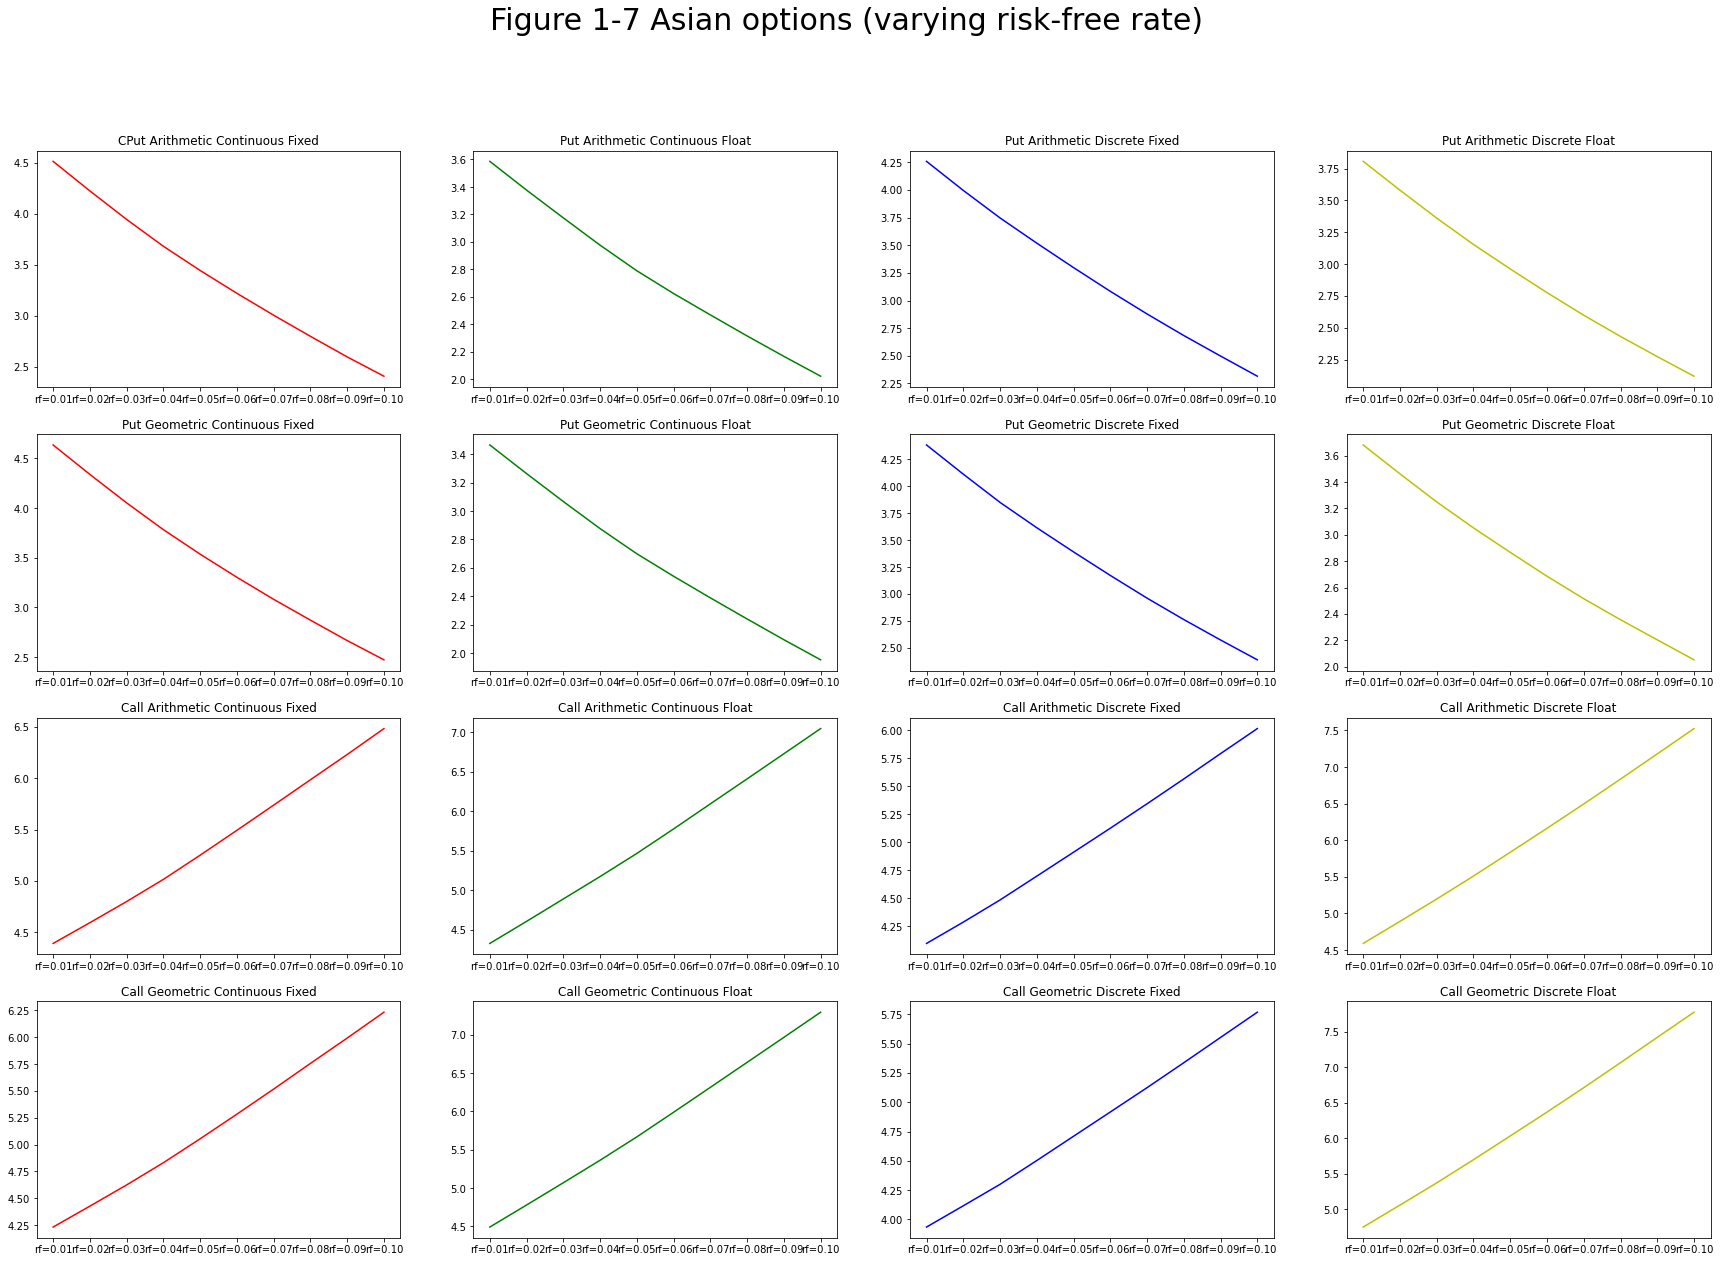

In [12]:
figure, axes = plt.subplots(4, 4, figsize=(30,20))

axes[0, 0].plot(Rf.iloc[0,:], color='r')
axes[0, 0].set_title('CPut Arithmetic Continuous Fixed')

axes[0, 1].plot(Rf.iloc[1,:], color='g')
axes[0, 1].set_title('Put Arithmetic Continuous Float')

axes[0, 2].plot(Rf.iloc[2,:], color='b')
axes[0, 2].set_title('Put Arithmetic Discrete Fixed')

axes[0, 3].plot(Rf.iloc[3,:], color='y')
axes[0, 3].set_title('Put Arithmetic Discrete Float')

axes[1, 0].plot(Rf.iloc[4,:], color='r')
axes[1, 0].set_title('Put Geometric Continuous Fixed')

axes[1, 1].plot(Rf.iloc[5,:], color='g')
axes[1, 1].set_title('Put Geometric Continuous Float')

axes[1, 2].plot(Rf.iloc[6,:], color='b')
axes[1, 2].set_title('Put Geometric Discrete Fixed')

axes[1, 3].plot(Rf.iloc[7,:], color='y')
axes[1, 3].set_title('Put Geometric Discrete Float')

axes[2, 0].plot(Rf.iloc[8,:], color='r')
axes[2, 0].set_title('Call Arithmetic Continuous Fixed')

axes[2, 1].plot(Rf.iloc[9,:], color='g')
axes[2, 1].set_title('Call Arithmetic Continuous Float')

axes[2, 2].plot(Rf.iloc[10,:], color='b')
axes[2, 2].set_title('Call Arithmetic Discrete Fixed')

axes[2, 3].plot(Rf.iloc[11,:], color='y')
axes[2, 3].set_title('Call Arithmetic Discrete Float')

axes[3, 0].plot(Rf.iloc[12,:], color='r')
axes[3, 0].set_title('Call Geometric Continuous Fixed')

axes[3, 1].plot(Rf.iloc[13,:], color='g')
axes[3, 1].set_title('Call Geometric Continuous Float')

axes[3, 2].plot(Rf.iloc[14,:], color='b')
axes[3, 2].set_title('Call Geometric Discrete Fixed')

axes[3, 3].plot(Rf.iloc[15,:], color='y')
axes[3, 3].set_title('Call Geometric Discrete Float')

plt.suptitle('Figure 1-7 Asian options (varying risk-free rate)', fontsize = 30)

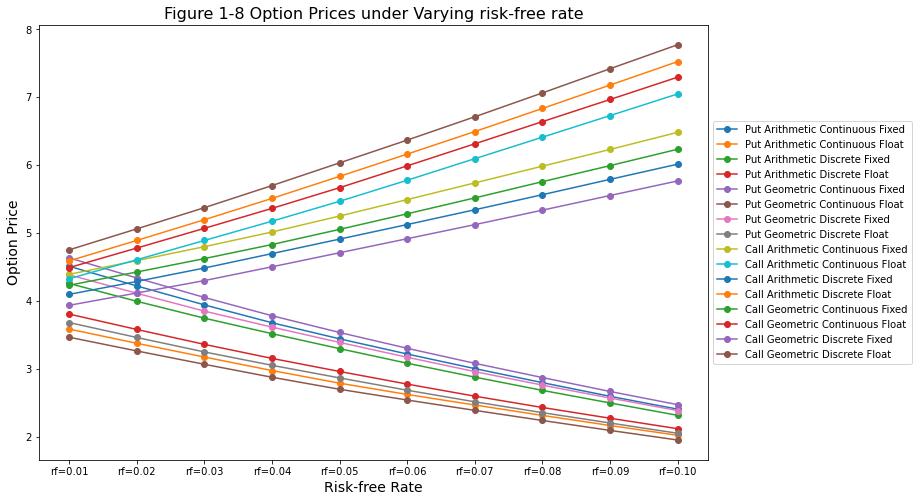

In [13]:
Rf=Rf.reset_index()
fig, ax = plt.subplots(figsize=(12, 8)) # set figure size

# plot the data
for i in range(len(Option_Head_Euler_rf)):
    ax.plot(Rf.columns[1:], Rf.iloc[i,1:], '-o', label=Rf.iloc[i,0])

# set plot title and axis labels
ax.set_title('Figure 1-8 Option Prices under Varying risk-free rate', fontsize=16)
ax.set_xlabel('Risk-free Rate', fontsize=14)
ax.set_ylabel('Option Price', fontsize=14)

# move the legend outside the figure
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### 3.3.3 Time to expiry
* Change volatility from 1 year to 10 year

In [14]:
dtePrice=[]
for t in arange(1,11,1):
    Option=Asian(100,0.05,0.2,t,252*t,100,21,100)

#Asian Option price based on the Euler Maruyama generating method 
    S_Euler=Option.simulate_path('Euler')
    Option_Value_Euler_dte=[]
    Option_Head_Euler_dte=[]
    for i in option_type:
        for j in mean_type:
            for ii in sampling_type:
                for jj in strike_type:
                    Option_Value_Euler_dte.append(Option.Asian_Option_payoff(i,j,ii,jj))
                    Option_Head_Euler_dte.append(str(i)+" "+str(j)+" "+str(ii)+" "+str(jj))
    
    dtePrice=dtePrice+[list(Option_Value_Euler_dte)]

    # show the option prices under varying volatility
dte_table=[[Option_Head_Euler_dte[i], dtePrice[0][i], dtePrice[1][i], dtePrice[2][i], dtePrice[3][i], dtePrice[4][i], dtePrice[5][i], dtePrice[6][i], dtePrice[7][i], dtePrice[8][i], dtePrice[9][i]] for i in range(len(Option_Head_Euler_dte))]
dte=pd.DataFrame(dte_table)
dte.columns=['Option Type','T-t=1','T-t=2','T-t=3','T-t=4','T-t=5','T-t=6','T-t=7','T-t=8','T-t=9','T-t=10']
dte=dte.set_index('Option Type')
dte

T-t=1     T-t=2      T-t=3      T-t=4  \
Option Type                                                                  
Put Arithmetic Continuous Fixed   3.442297  3.728591   3.487467   3.605326   
Put Arithmetic Continuous Float   2.789126  3.576974   4.237336   5.345201   
Put Arithmetic Discrete Fixed     3.297524  3.662965   3.460322   3.563579   
Put Arithmetic Discrete Float     2.961678  3.688208   4.296034   5.393940   
Put Geometric Continuous Fixed    3.535842  3.879180   3.713904   3.908304   
Put Geometric Continuous Float    2.699405  3.394103   4.014994   4.980974   
Put Geometric Discrete Fixed      3.389769  3.816925   3.681020   3.867810   
Put Geometric Discrete Float      2.866979  3.497781   4.077088   5.032312   
Call Arithmetic Continuous Fixed  5.250322  7.926346  10.497608  13.208536   
Call Arithmetic Continuous Float  5.466945  8.312026  13.628047  16.704367   
Call Arithmetic Discrete Fixed    4.910538  7.690618  10.248434  12.966588   
Call Arithmetic Discrete Float    5.834509  8.593362  13.908775  16.953307   
Call Geometric Continuous Fixed   5.053524  7.539587   9.818918  12.083964   
Call Geometric Continuous Float   5.667568  8.666503  14.310833  17.767690   
Call Geometric Discrete Fixed     4.709682  7.305787   9.577401  11.854353   
Call Geometric Discrete Float     6.032911  8.941726  14.581560  18.008144   

                                      T-t=5      T-t=6      T-t=7      T-t=8  \
Option Type                                                                    
Put Arithmetic Continuous Fixed    3.819267   3.956031   3.993795   4.072418   
Put Arithmetic Continuous Float    5.039017   4.859001   5.887312   6.096349   
Put Arithmetic Discrete Fixed      3.781442   3.928933   3.965794   4.051649   
Put Arithmetic Discrete Float      5.073775   4.871633   5.909721   6.118852   
Put Geometric Continuous Fixed     4.178543   4.321785   4.392232   4.512083   
Put Geometric Continuous Float     4.650792   4.347290   5.294837   5.468042   
Put Geometric Discrete Fixed       4.138514   4.296668   4.365752   4.491262   
Put Geometric Discrete Float       4.682009   4.356477   5.319525   5.486422   
Call Arithmetic Continuous Fixed  15.630057  17.558121  18.846040  19.936068   
Call Arithmetic Continuous Float  17.023904  18.823213  18.414503  22.432345   
Call Arithmetic Discrete Fixed    15.393195  17.340674  18.652292  19.732064   
Call Arithmetic Discrete Float    17.257699  19.026193  18.602658  22.638083   
Call Geometric Continuous Fixed   14.097110  15.660508  16.703568  17.535336   
Call Geometric Continuous Float   18.527902  20.574868  20.362936  24.644434   
Call Geometric Discrete Fixed     13.866457  15.453891  16.522090  17.347717   
Call Geometric Discrete Float     18.749742  20.765555  20.542623  24.829613   

                                      T-t=9     T-t=10  
Option Type                                             
Put Arithmetic Continuous Fixed    4.028712   4.019961  
Put Arithmetic Continuous Float    5.857502   5.892275  
Put Arithmetic Discrete Fixed      4.006883   4.003035  
Put Arithmetic Discrete Float      5.879105   5.909454  
Put Geometric Continuous Fixed     4.501093   4.476464  
Put Geometric Continuous Float     5.218804   5.164474  
Put Geometric Discrete Fixed       4.482493   4.461026  
Put Geometric Discrete Float       5.239953   5.177173  
Call Arithmetic Continuous Fixed  21.080936  21.780859  
Call Arithmetic Continuous Float  20.734139  21.022987  
Call Arithmetic Discrete Fixed    20.888477  21.606611  
Call Arithmetic Discrete Float    20.926372  21.197487  
Call Geometric Continuous Fixed   18.335515  18.820189  
Call Geometric Continuous Float   23.313243  23.712358  
Call Geometric Discrete Fixed     18.159945  18.656533  
Call Geometric Discrete Float     23.491362  23.873276

Text(0.5, 0.98, 'Figure 1-9 Asian options (Time-to-Expiry)')

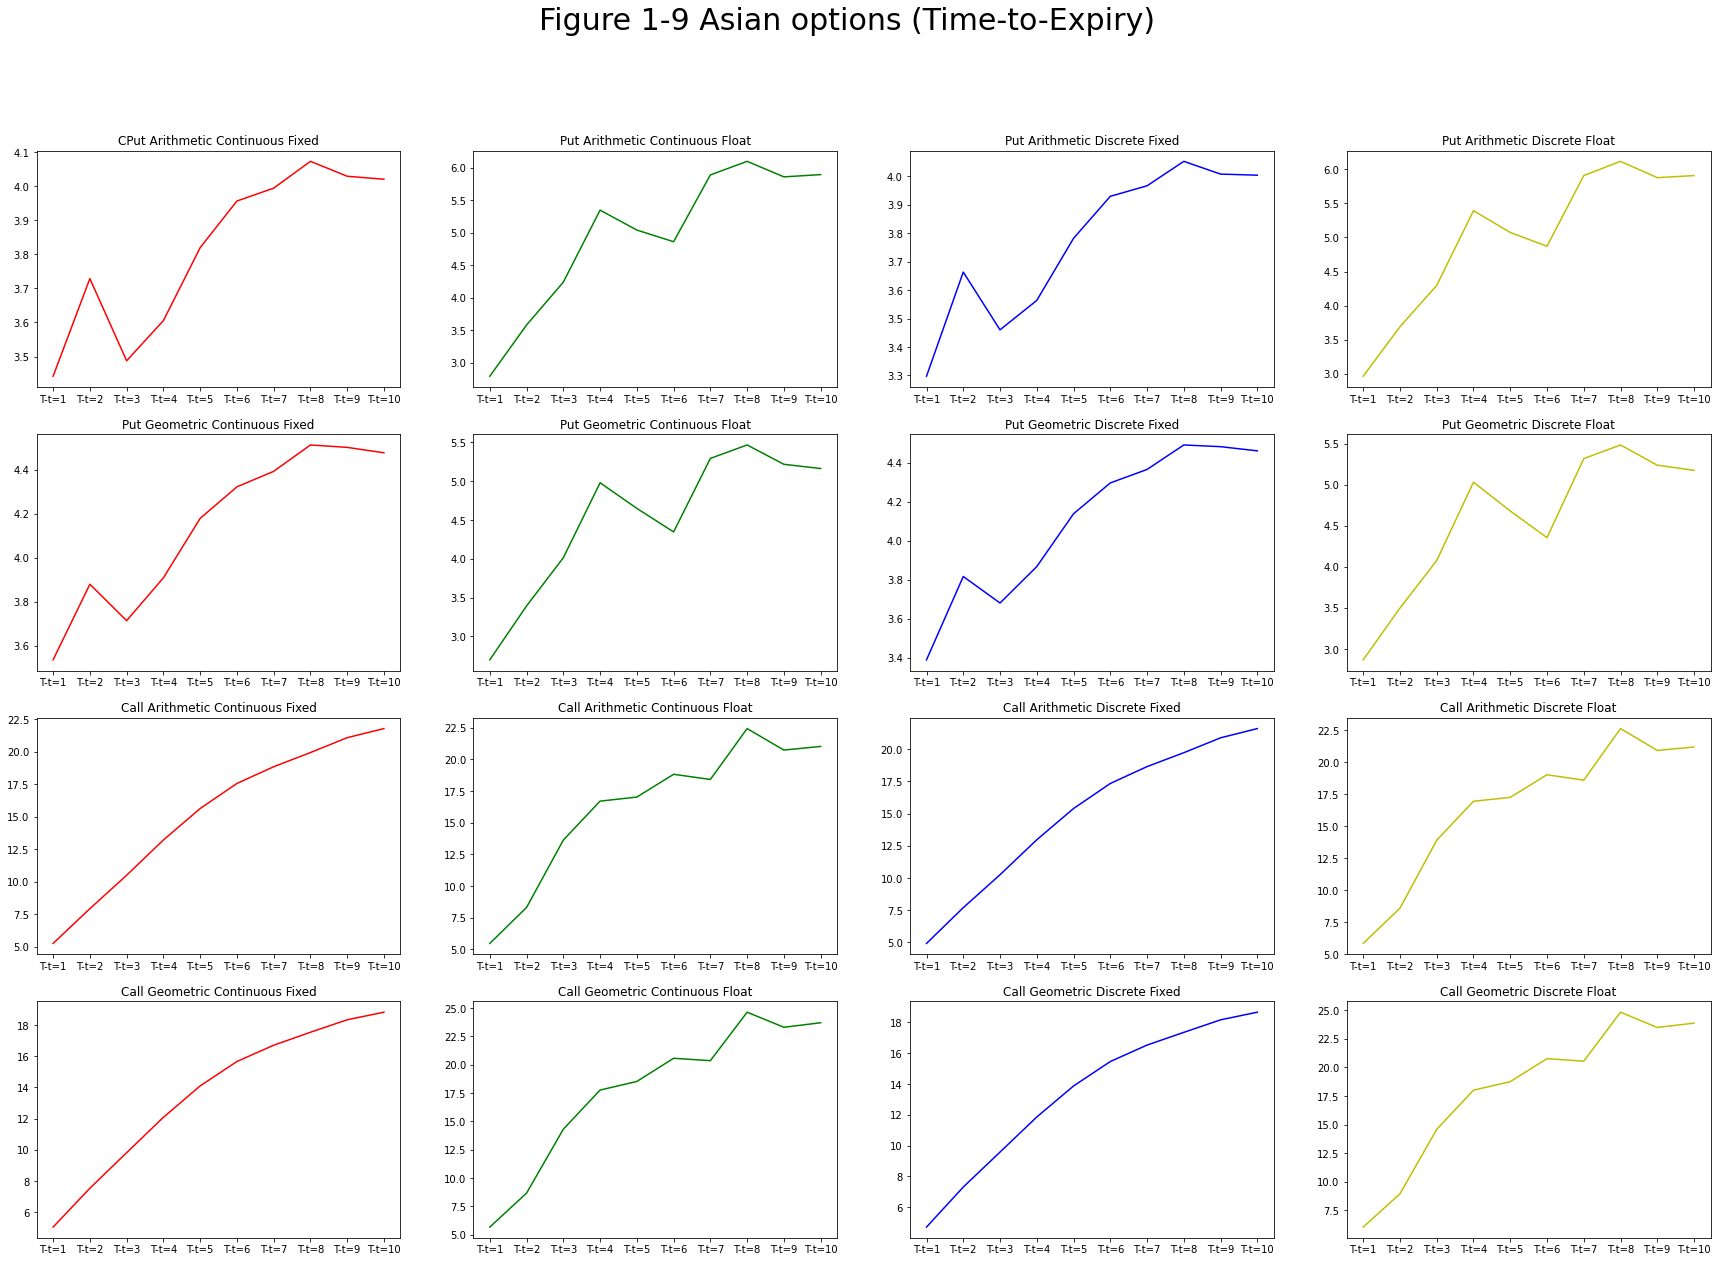

In [15]:
figure, axes = plt.subplots(4, 4, figsize=(30,20))

axes[0, 0].plot(dte.iloc[0,:], color='r')
axes[0, 0].set_title('CPut Arithmetic Continuous Fixed')

axes[0, 1].plot(dte.iloc[1,:], color='g')
axes[0, 1].set_title('Put Arithmetic Continuous Float')

axes[0, 2].plot(dte.iloc[2,:], color='b')
axes[0, 2].set_title('Put Arithmetic Discrete Fixed')

axes[0, 3].plot(dte.iloc[3,:], color='y')
axes[0, 3].set_title('Put Arithmetic Discrete Float')

axes[1, 0].plot(dte.iloc[4,:], color='r')
axes[1, 0].set_title('Put Geometric Continuous Fixed')

axes[1, 1].plot(dte.iloc[5,:], color='g')
axes[1, 1].set_title('Put Geometric Continuous Float')

axes[1, 2].plot(dte.iloc[6,:], color='b')
axes[1, 2].set_title('Put Geometric Discrete Fixed')

axes[1, 3].plot(dte.iloc[7,:], color='y')
axes[1, 3].set_title('Put Geometric Discrete Float')

axes[2, 0].plot(dte.iloc[8,:], color='r')
axes[2, 0].set_title('Call Arithmetic Continuous Fixed')

axes[2, 1].plot(dte.iloc[9,:], color='g')
axes[2, 1].set_title('Call Arithmetic Continuous Float')

axes[2, 2].plot(dte.iloc[10,:], color='b')
axes[2, 2].set_title('Call Arithmetic Discrete Fixed')

axes[2, 3].plot(dte.iloc[11,:], color='y')
axes[2, 3].set_title('Call Arithmetic Discrete Float')

axes[3, 0].plot(dte.iloc[12,:], color='r')
axes[3, 0].set_title('Call Geometric Continuous Fixed')

axes[3, 1].plot(dte.iloc[13,:], color='g')
axes[3, 1].set_title('Call Geometric Continuous Float')

axes[3, 2].plot(dte.iloc[14,:], color='b')
axes[3, 2].set_title('Call Geometric Discrete Fixed')

axes[3, 3].plot(dte.iloc[15,:], color='y')
axes[3, 3].set_title('Call Geometric Discrete Float')

plt.suptitle('Figure 1-9 Asian options (Time-to-Expiry)', fontsize = 30)

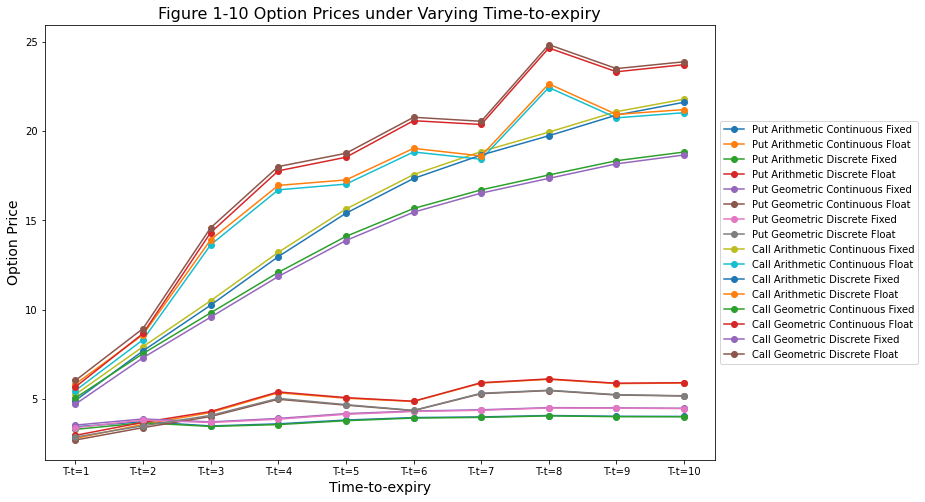

In [16]:
dte=dte.reset_index()
fig, ax = plt.subplots(figsize=(12, 8)) # set figure size

# plot the data
for i in range(len(Option_Head_Euler_dte)):
    ax.plot(dte.columns[1:], dte.iloc[i,1:], '-o', label=dte.iloc[i,0])

# set plot title and axis labels
ax.set_title('Figure 1-10 Option Prices under Varying Time-to-expiry', fontsize=16)
ax.set_xlabel('Time-to-expiry', fontsize=14)
ax.set_ylabel('Option Price', fontsize=14)

# move the legend outside the figure
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### 3.3.4 Strike Price
* Change Strike Price from 100  to 200

In [17]:
KPrice=[]
for k in arange(100,200,10):
    Option=Asian(100,0.05,0.2,1,252,100,21,k)

#Asian Option price based on the Euler Maruyama generating method 
    S_Euler=Option.simulate_path('Euler')
    Option_Value_Euler_K=[]
    Option_Head_Euler_K=[]
    for i in option_type:
        for j in mean_type:
            for ii in sampling_type:
                for jj in strike_type:
                    Option_Value_Euler_K.append(Option.Asian_Option_payoff(i,j,ii,jj))
                    Option_Head_Euler_K.append(str(i)+" "+str(j)+" "+str(ii)+" "+str(jj))
    
    KPrice=KPrice+[list(Option_Value_Euler_K)]

    # show the option prices under varying volatility
K_table=[[Option_Head_Euler_K[i], KPrice[0][i], KPrice[1][i], KPrice[2][i], KPrice[3][i], KPrice[4][i], KPrice[5][i], KPrice[6][i], KPrice[7][i], KPrice[8][i], KPrice[9][i]] for i in range(len(Option_Head_Euler_K))]
K=pd.DataFrame(K_table)
K.columns=['Option Type','K=100','K=110','K=120','K=130','K=140','K=150','K=160','K=170','K=180','K=190']
K=K.set_index('Option Type')
K

K=100     K=110      K=120      K=130  \
Option Type                                                                  
Put Arithmetic Continuous Fixed   3.442297  9.253274  17.602856  26.876636   
Put Arithmetic Continuous Float   2.789126  2.789126   2.789126   2.789126   
Put Arithmetic Discrete Fixed     3.297524  9.223437  17.714846  27.046998   
Put Arithmetic Discrete Float     2.961678  2.961678   2.961678   2.961678   
Put Geometric Continuous Fixed    3.535842  9.417419  17.847695  27.150282   
Put Geometric Continuous Float    2.699405  2.699405   2.699405   2.699405   
Put Geometric Discrete Fixed      3.389769  9.391796  17.964695  27.321580   
Put Geometric Discrete Float      2.866979  2.866979   2.866979   2.866979   
Call Arithmetic Continuous Fixed  5.250322  1.549005   0.386293   0.147779   
Call Arithmetic Continuous Float  5.466945  5.466945   5.466945   5.466945   
Call Arithmetic Discrete Fixed    4.910538  1.324156   0.303271   0.123129   
Call Arithmetic Discrete Float    5.834509  5.834509   5.834509   5.834509   
Call Geometric Continuous Fixed   5.053524  1.422806   0.340788   0.131081   
Call Geometric Continuous Float   5.667568  5.667568   5.667568   5.667568   
Call Geometric Discrete Fixed     4.709682  1.199415   0.260020   0.104610   
Call Geometric Discrete Float     6.032911  6.032911   6.032911   6.032911   

                                      K=140      K=150      K=160      K=170  \
Option Type                                                                    
Put Arithmetic Continuous Fixed   36.293807  45.753446  55.265740  64.778034   
Put Arithmetic Continuous Float    2.789126   2.789126   2.789126   2.789126   
Put Arithmetic Discrete Fixed     36.464170  45.948458  55.460752  64.973046   
Put Arithmetic Discrete Float      2.961678   2.961678   2.961678   2.961678   
Put Geometric Continuous Fixed    36.567453  46.043790  55.556084  65.068378   
Put Geometric Continuous Float     2.699405   2.699405   2.699405   2.699405   
Put Geometric Discrete Fixed      36.738751  46.241558  55.753853  65.266147   
Put Geometric Discrete Float       2.866979   2.866979   2.866979   2.866979   
Call Arithmetic Continuous Fixed   0.052656   0.000000   0.000000   0.000000   
Call Arithmetic Continuous Float   5.466945   5.466945   5.466945   5.466945   
Call Arithmetic Discrete Fixed     0.028006   0.000000   0.000000   0.000000   
Call Arithmetic Discrete Float     5.834509   5.834509   5.834509   5.834509   
Call Geometric Continuous Fixed    0.035958   0.000000   0.000000   0.000000   
Call Geometric Continuous Float    5.667568   5.667568   5.667568   5.667568   
Call Geometric Discrete Fixed      0.009487   0.000000   0.000000   0.000000   
Call Geometric Discrete Float      6.032911   6.032911   6.032911   6.032911   

                                      K=180      K=190  
Option Type                                             
Put Arithmetic Continuous Fixed   74.290328  83.802623  
Put Arithmetic Continuous Float    2.789126   2.789126  
Put Arithmetic Discrete Fixed     74.485341  83.997635  
Put Arithmetic Discrete Float      2.961678   2.961678  
Put Geometric Continuous Fixed    74.580672  84.092967  
Put Geometric Continuous Float     2.699405   2.699405  
Put Geometric Discrete Fixed      74.778441  84.290735  
Put Geometric Discrete Float       2.866979   2.866979  
Call Arithmetic Continuous Fixed   0.000000   0.000000  
Call Arithmetic Continuous Float   5.466945   5.466945  
Call Arithmetic Discrete Fixed     0.000000   0.000000  
Call Arithmetic Discrete Float     5.834509   5.834509  
Call Geometric Continuous Fixed    0.000000   0.000000  
Call Geometric Continuous Float    5.667568   5.667568  
Call Geometric Discrete Fixed      0.000000   0.000000  
Call Geometric Discrete Float      6.032911   6.032911

Text(0.5, 0.98, 'Figure 1-11 Asian options (varying Strike Price)')

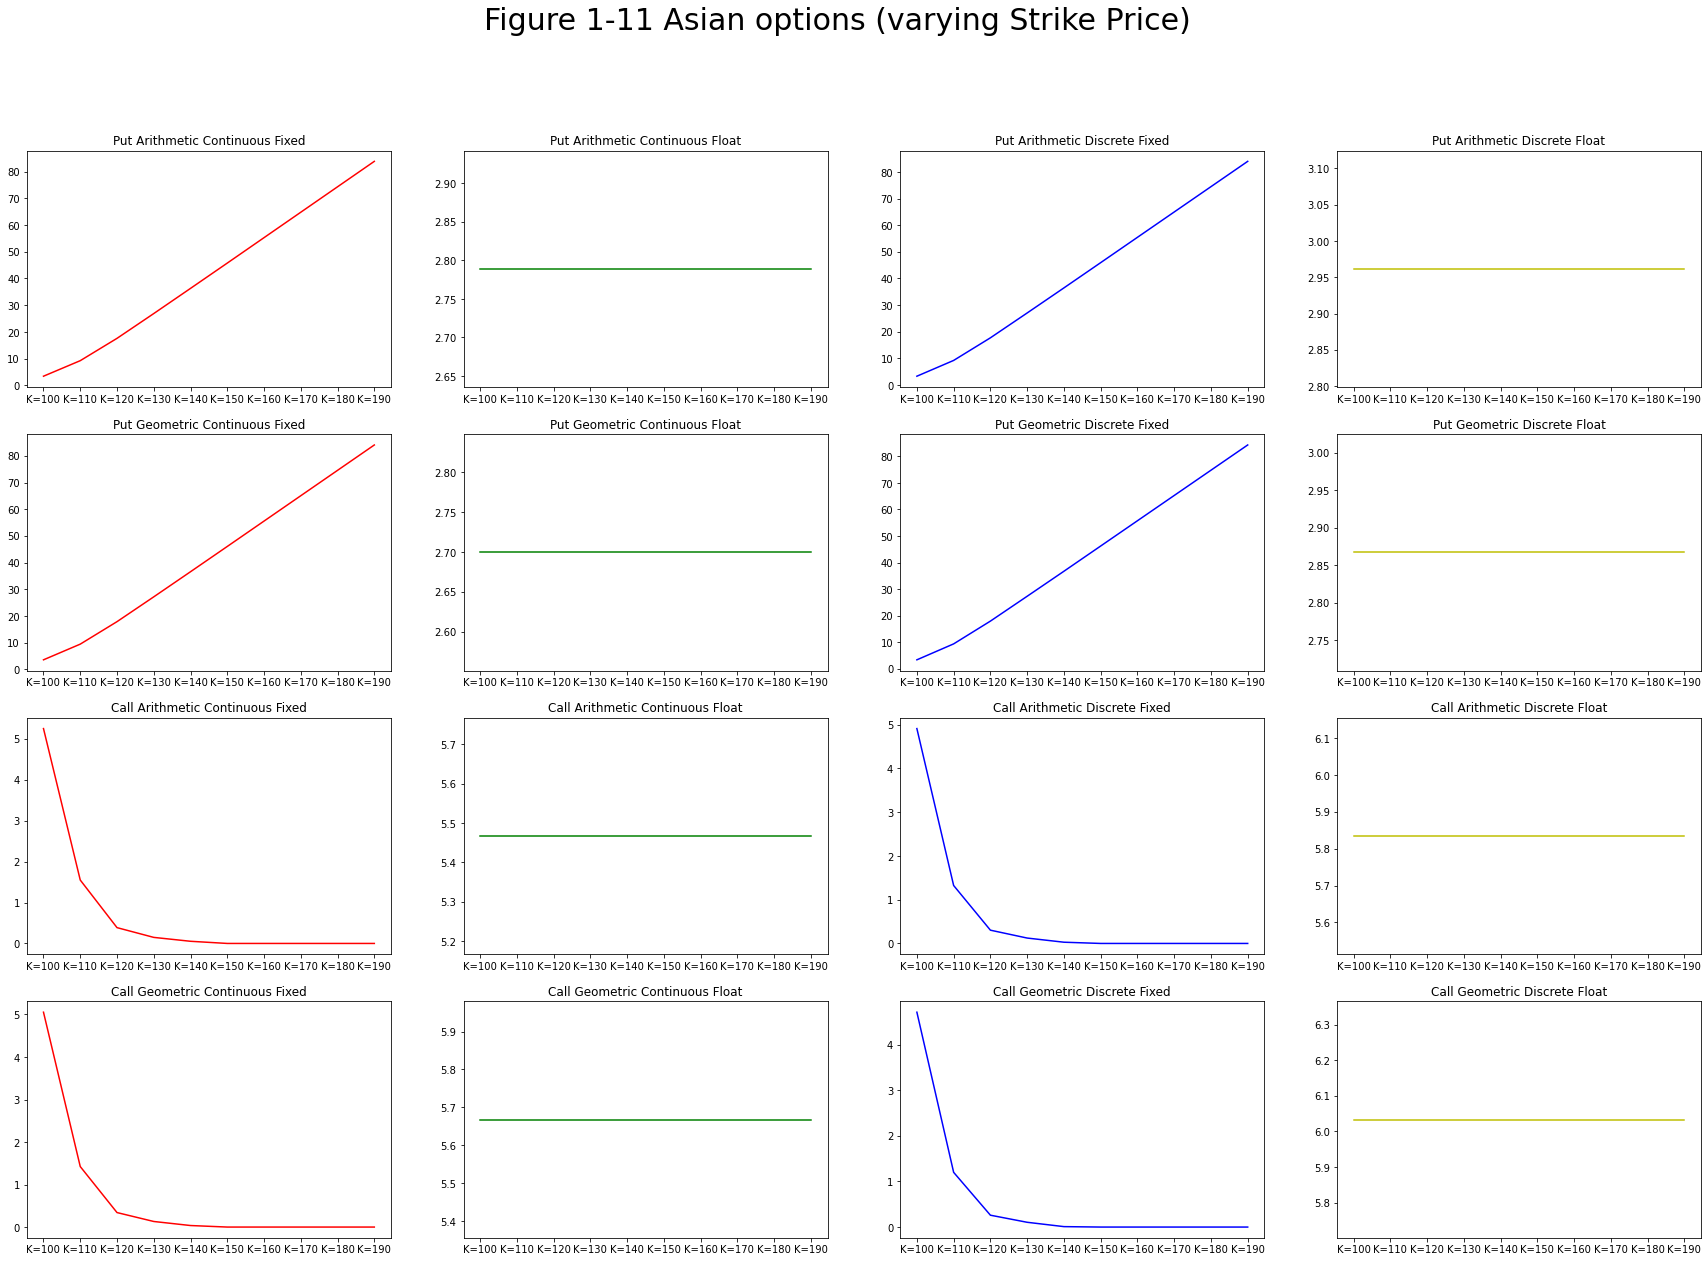

In [18]:
figure, axes = plt.subplots(4, 4, figsize=(30,20))

axes[0, 0].plot(K.iloc[0,:], color='r')
axes[0, 0].set_title('Put Arithmetic Continuous Fixed')

axes[0, 1].plot(K.iloc[1,:], color='g')
axes[0, 1].set_title('Put Arithmetic Continuous Float')

axes[0, 2].plot(K.iloc[2,:], color='b')
axes[0, 2].set_title('Put Arithmetic Discrete Fixed')

axes[0, 3].plot(K.iloc[3,:], color='y')
axes[0, 3].set_title('Put Arithmetic Discrete Float')

axes[1, 0].plot(K.iloc[4,:], color='r')
axes[1, 0].set_title('Put Geometric Continuous Fixed')

axes[1, 1].plot(K.iloc[5,:], color='g')
axes[1, 1].set_title('Put Geometric Continuous Float')

axes[1, 2].plot(K.iloc[6,:], color='b')
axes[1, 2].set_title('Put Geometric Discrete Fixed')

axes[1, 3].plot(K.iloc[7,:], color='y')
axes[1, 3].set_title('Put Geometric Discrete Float')

axes[2, 0].plot(K.iloc[8,:], color='r')
axes[2, 0].set_title('Call Arithmetic Continuous Fixed')

axes[2, 1].plot(K.iloc[9,:], color='g')
axes[2, 1].set_title('Call Arithmetic Continuous Float')

axes[2, 2].plot(K.iloc[10,:], color='b')
axes[2, 2].set_title('Call Arithmetic Discrete Fixed')

axes[2, 3].plot(K.iloc[11,:], color='y')
axes[2, 3].set_title('Call Arithmetic Discrete Float')

axes[3, 0].plot(K.iloc[12,:], color='r')
axes[3, 0].set_title('Call Geometric Continuous Fixed')

axes[3, 1].plot(K.iloc[13,:], color='g')
axes[3, 1].set_title('Call Geometric Continuous Float')

axes[3, 2].plot(K.iloc[14,:], color='b')
axes[3, 2].set_title('Call Geometric Discrete Fixed')

axes[3, 3].plot(K.iloc[15,:], color='y')
axes[3, 3].set_title('Call Geometric Discrete Float')

plt.suptitle('Figure 1-11 Asian options (varying Strike Price)', fontsize = 30)

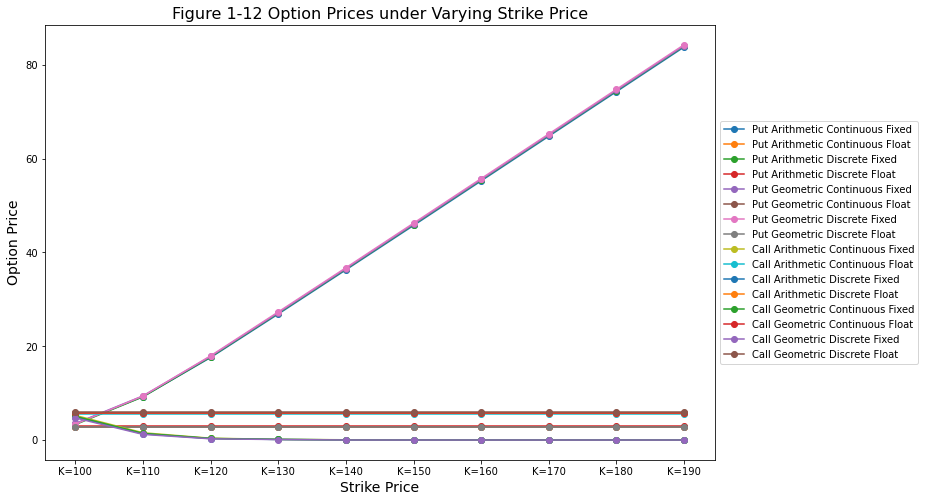

In [19]:
K=K.reset_index()
fig, ax = plt.subplots(figsize=(12, 8)) # set figure size

# plot the data
for i in range(len(Option_Head_Euler_K)):
    ax.plot(K.columns[1:], K.iloc[i,1:], '-o', label=K.iloc[i,0])

# set plot title and axis labels
ax.set_title('Figure 1-12 Option Prices under Varying Strike Price', fontsize=16)
ax.set_xlabel('Strike Price', fontsize=14)
ax.set_ylabel('Option Price', fontsize=14)

# move the legend outside the figure
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Conclusion

* (1) **Volatility** The price of all types of Asian options demonstrates an upward trend as volatility increases.
* (2) **risk-free rate** The price of a call option tends to rise as the risk interest rate increases, while the price of a put option tends to fall as the risk-free rate increases.
* (3)  **Time-to-expiry** As the time-to-expiry of an option increases, the price of all types of options tends to increase. This is due to the higher likelihood of the option generating gains over a longer time horizon. Additionally, discrete average Asian options exhibit smoother curves compared to their continuous counterparts.
* (4) **Strike Price** The price of a Floating Option is not impacted by changes in the strike price, as this is not a parameter required by this type of option. In contrast, Fixed Asian Options are affected by changes in the strike price. Specifically, for call options, the price tends to decrease as the strike price increases, while for put options, the price tends to increase as the strike price increases.

## Question 2

### 2.1 The numercial Approximation:

Using the numercial approxi,ation for each derivative to express the ODE in question 2 is as following:
$$(1+\frac{\delta x}{2}P_{i})y_{i+1}+(-2+\delta x^{2}Q_{i})y_{i}+(1-\frac{\delta x}{2}P_{i})y_{i-1}=\delta x^{2}f_{i}$$




 * The boundary Condition
 $$y_{0}=y(x_{0})=y(a)=\alpha$$
 $$y_{n}=y(x_{n})=y(b)=\beta$$
 where $$i=1,....,n-1; \delta x=\frac{b-a}{n}$$

### 2.2 Linear System :
The above ODE could be expreesed as a matrix inversion problem: 
$$\mathbf{A}X=\mathbf{b}$$

 For simlistic, I set: 
 $$a=(1+\frac{\delta x}{2}P_{i})/\delta x^{2}$$
 $$b=(-2+\delta x^{2}Q_{i})y_{i})/\delta x^{2}$$
 $$c=(1-\frac{\delta x}{2}P_{i})/\delta x^{2}$$


Thus, 
The matrix A could be expressed as:

$$A=
 \left[
 \begin{matrix}
   1 & 0 & 0 & 0 &......& 0 & 0 \\
   c & b & a & 0 &......& 0 & 0 \\
   0 & c & b & a &......& 0 & 0 \\
   0 & 0 & c & b &......& 0 & 0 \\
   ..&.. &.. &.. &......& ..&..  \\
   0 & 0 & 0 & 0 &......& c & b \\
   0 & 0 & 0 & 0 &......& 0 & c \\
   0 & 0 & 0 & 0 &......& 0 & 1
  \end{matrix}
  \right] \tag{3}
$$

Consider the boundary condition, the number in top left corner and the bottom right corner must make some change.


$$A=
 \left[
 \begin{matrix}
   \frac{f(a)}{\alpha} & 0 & 0 & 0 &......& 0 & 0 \\
   c & b & a & 0 &......& 0 & 0 \\
   0 & c & b & a &......& 0 & 0 \\
   0 & 0 & c & b &......& 0 & 0 \\
   ..&.. &.. &.. &......& ..&..  \\
   0 & 0 & 0 & 0 &......& c & b \\
   0 & 0 & 0 & 0 &......& 0 & c \\
   0 & 0 & 0 & 0 &......& 0 & \frac{f(b)}{\beta)}
  \end{matrix}
  \right] \tag{3}
$$

### 2.3 Differential Equation problem
$$y''(x) + 3 y'(x) + 2 y(x) = 4x^{2}$$
where $$y(1)=1, y(2)=6$$


Following the analysis above, I can write this problem as a linear problem:
 * Numerical Approximation
 $$(1+\frac{\delta x}{2}3)y_{i+1}+(-2+\delta x^{2}2)y_{i}+(1-\frac{\delta x}{2}3)y_{i-1}=\delta x^{2}f_{i}$$
 where $$i=1,....,n-1$$
 
 * The boundary Condition
 $$y_{0}=y(x_{0})=y(1)=1$$
 $$y_{n}=y(x_{n})=y(2)=6$$
 
 $$\mathbf{A}X=\mathbf{b}$$
 
 I set  
 $$a=(1+\frac{\delta x}{2}3)/\delta x^{2}$$
 $$b=(-2+\delta x^{2}2)y_{i})/\delta x^{2}$$
 $$c=(1-\frac{\delta x}{2}3)/\delta x^{2}$$
 
 
 
 $$A=
 \left[
 \begin{matrix}
   4 & 0 & 0 & 0 &......& 0 & 0 \\
   c & b & a & 0 &......& 0 & 0 \\
   0 & c & b & a &......& 0 & 0 \\
   0 & 0 & c & b &......& 0 & 0 \\
   ..&.. &.. &.. &......& ..&..  \\
   0 & 0 & 0 & 0 &......& c & b \\
   0 & 0 & 0 & 0 &......& 0 & c \\
   0 & 0 & 0 & 0 &......& 0 & \frac{8}{3}
  \end{matrix}
  \right] \tag{3}
$$



$$y=
 \left[
 \begin{matrix}
   y_{0}  \\
   y_{1}  \\
   y_{2} \\
   y_{3}  \\
   ...  \\
   y_{n-2}\\
   y_{n-1} \\
   y_{n} 
  \end{matrix}
  \right] \tag{3}
$$



$$b=
 \left[
 \begin{matrix}
   f(x_{0})  \\
   f(x_{1})  \\
   f(x_{2}) \\
   f(x_{3})  \\
   ...  \\
   f(x_{n-2})\\
   f(x_{n-1}) \\
   f(x_{n}) 
  \end{matrix}
  \right] \tag{3}
$$

In [20]:
'''
define a linear system
'''
#define the RHS function f(x)
def f(x):
    return 4*x**2
#solve the linear function
#the NS input is the number of simulation
def solve(NS):
    # set the matrix A
    x=np.linspace(L,R,NS+1)
    dx   =(R-L) / NS
    a = (1+(dx/2*P))/(dx**2)
    b = (-2+dx**2*Q)/(dx**2)
    c=(1-(dx/2*P) )/(dx**2)
    A1 = np.array([4]+[b]*(NS-1)+[8/3])
    A2 = np.array([c]*(NS-1)+[0])
    A3 = np.array([0]+[a]*(NS-1))
    A = np.diag(A1)+np.diag(A2,-1)+np.diag(A3,1)
    #set matrix B
    b = f(x)
    y = np.linalg.solve(A,b)
    return y,x

### Specify the the question 2

In [21]:
P=3
Q=2
#set the boundry
L=1
R=2

Text(0.5, 0.98, 'Figure 2-1 Differential Equation Function with varying N')

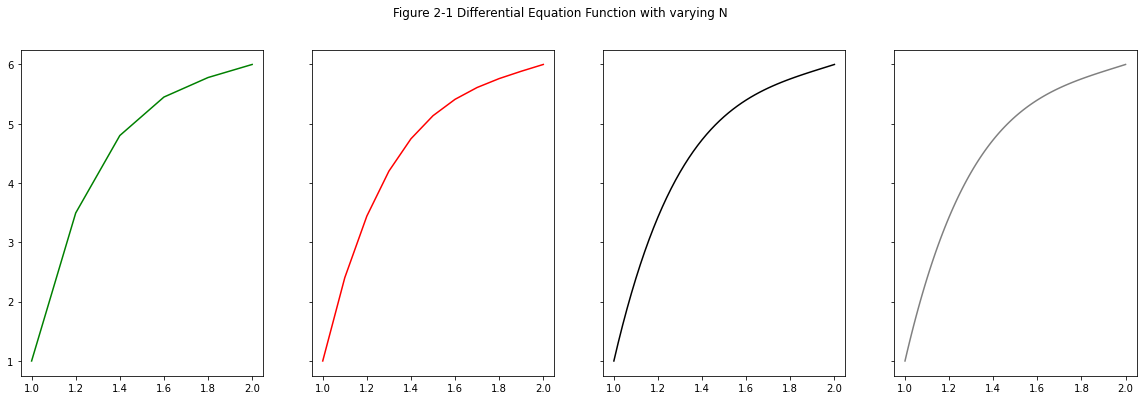

In [22]:
step_list=[5,10,50,100]
# visualize call and put price for range of spot prices
figure, axes = plt.subplots(1,4, figsize=(20,6), sharey=True)
title, payoff, color, grid = ['N=5','N=10', 'N=50','N=100'], [solve(step_list[0])[0], solve(step_list[1])[0], solve(step_list[2])[0],solve(step_list[3])[0]], ['green', 'red','black','grey'], [solve(step_list[0])[1], solve(step_list[1])[1],solve(step_list[2])[1],solve(step_list[3])[1]]

# plot payoff 
for i in range(4):
    axes[i].plot(grid[i], payoff[i], color=color[i])

figure.suptitle('Figure 2-1 Differential Equation Function with varying N' )

### Conclusion: 
* According to the graph above, it is apparent that the curve becomes increasingly smoother as the value of n increases. This observation suggests that the approximated function approaches the true function as the number of simulations increases.

In [23]:
N_10=pd.DataFrame({"solution":solve(10)[0],'NS':solve(10)[1]})
N_50=pd.DataFrame({"solution":solve(50)[0],'NS':solve(50)[1]})
N_100=pd.DataFrame({"solution":solve(100)[0],'NS':solve(100)[1]})
N_10

solution   NS
0   1.000000  1.0
1   2.404697  1.1
2   3.443218  1.2
3   4.201025  1.3
4   4.746864  1.4
5   5.135930  1.5
6   5.412442  1.6
7   5.611733  1.7
8   5.761962  1.8
9   5.885489  1.9
10  6.000000  2.0

In [24]:
#use the built-in function to calculate the analytical  solution function 
f = symbols('f', cls=Function,real=True)
x_ = symbols('x',real=True)
eq = Eq(f(x_).diff(x_, 2) +3 *f(x_).diff(x_) + 2*f(x_), 4*x_**2)
con={f(1):1,f(2):6}
dsolve(eq, ics=con)

Eq(f(x), 2*x**2 - 6*x + 7 + (2*E + 3*exp(3))*exp(-x)/(-1 + E) + (-3*exp(4) - 2*exp(3))*exp(-2*x)/(-1 + E))

In [25]:
# set the simulation number to 10 
# comparing the simulated function with the analytical function that was previously demonstrated
c1=-1*(2*math.e**3+3*math.e**4)/(math.e-1)
c2=(2*math.e+3*math.e**3)/(math.e-1)

def f(x):
    return c1*np.exp(-2*x)+c2*np.exp(-1*x)+2*x**2-6*x+7

x=np.arange(1,2,0.02)

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x,
    y=f(x), 
 mode='lines', name = 'Analytical Solution'))


fig.add_trace(go.Scatter(
    x=N_50['NS'],
    y=N_50['solution'], 
 mode='lines+markers', name = 'Estimated Function'))


# Edit the layout
fig.update_layout(title='Figure 2-2 Analytical Solution & Approximated Solution',
                   xaxis_title='Step',
                   yaxis_title='Estimated function')


fig.show()
    

### Conclusion
* Through the application of Monte Carlo simulation, the approximated function closely aligns with the true function.


# Question 3
Calculating Integral using Monte Carlo Simulation

### Conclusion
* In general, I observed that as the number of simulations increased, the error in the integration estimation approached zero.

* 3.1 $$\int_{1}^{3}x^{2}dx$$

The actual Value of this integral
$\int_{1}^{3}x^{2}dx
=\int_{1}^{3} x^2 dx 
= \left[ \frac{1}{3}x^3 \right]_{1}^{3} \\
= \frac{1}{3}(3^3 - 1^3) \\
= \frac{1}{3}(27 - 1) \\
= \frac{1}{3}(26) \\
= \boxed{\frac{26}{3}}$


In [26]:
#Solve this integral  y MC method
a=1
b=3
MC_intergralOne=[]
One=0
for n in arange(100,10000,100):
    sum_f=0
    for i in range(n):
        u=np.random.uniform(0,1)
        f=(b-a)*((u*(b-a))+a)**2
        sum_f+=f
    One=sum_f/n
    MC_intergralOne.append(One)

In [27]:
actual_Value_One=26/3
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=arange(100,10000,100),
    y=np.array(actual_Value_One)-MC_intergralOne, 
 mode='lines+markers'))


# Edit the layout
fig.update_layout(title='Figure 3-1 Error of Integration with Number of Simulations',
                   xaxis_title='Number of Simulations',
                   yaxis_title='Integration Error')


fig.show()

* 3.2 Gaussian Integral
$$ \int_0^\infty e^{-x^2} dx$$

Let $$I = \int_0^\infty e^{-x^2} dx $$


$I^2 = \int_0^\infty e^{-x^2} dx \int_0^\infty e^{-y^2} dy \\
= \int_0^\infty \int_0^\infty e^{-(x^2+y^2)} dxdy \\
= \int_0^{\frac{\pi}{2}} \int_0^\infty e^{-r^2} r dr d\theta \quad (x = r\cos\theta, y = r\sin\theta) \\
= \int_0^{\frac{\pi}{2}} \left[-\frac{1}{2}e^{-r^2}\right]_0^\infty d\theta \\
= \frac{\pi}{2} \cdot \frac{1}{2} \\
= \frac{\pi}{4}$

Thus, 
$I = \int_0^\infty e^{-x^2} dx = \sqrt{\frac{\pi}{4}} = \frac{\sqrt{\pi}}{2}$






In [28]:
Two=0
MC_intergralTwo=[]
for n in arange(100,10000,100):
    sum_f=0
    for i in range(n):
        u=np.random.uniform(0,1)
        f=(math.exp(-(-1+1/u)**2))/u**2
        sum_f+=f
    Two=sum_f/n
    MC_intergralTwo.append(Two)

In [29]:
actual_Value_Two=sqrt(math.pi)/2
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=arange(100,10000,100),
    y=[float(str(x)) for x in (np.array(actual_Value_Two)-MC_intergralTwo)], 
 mode='lines+markers'))


# Edit the layout
fig.update_layout(title='Figure 3-2 Error of Integration with Number of Simulations',
                   xaxis_title='Number of Simulations',
                   yaxis_title='Integration Error')


fig.show()

* 3.3 
* The Actual Value of the Intergration:
$$\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty x^{4}e^{-x^2/2} dx  $$
Let $u = x^3$ and $dv = x e^{-x^2/2} dx$. 
Then we have $du = 3x^2 dx$ and $v = -e^{-x^2/2}$ 

Thus, 
$\int x^4 e^{-x^2/2} dx \\
= -x^3 e^{-x^2/2} + 3 \int x^2 e^{-x^2/2} dx \\
= -x^3 e^{-x^2/2} + 3 \left(-x e^{-x^2/2} + \int e^{-x^2/2} dx\right) \\
= -x^3 e^{-x^2/2} - 3x e^{-x^2/2} + 3\sqrt{2\pi} \cdot \text{pdf}(x)$

where $\text{pdf}(x)$ is the standard normal probability density function. The standard normal distribution is a normal distribution with a mean of $0$ and a standard deviation of $1$. Its probability density function is:

$ \text{pdf}(x)=\frac{1}{\sqrt{2\pi}}e^{-x^2/2}$

Then:

$\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty x^{4}e^{-x^2/2} dx \\
=\frac{1}{\sqrt{2\pi}} \int_{-\infty}^\infty (-x^3 - x)e^{-x^2/2} dx +  \frac{3}{\sqrt{2\pi}} \int_{-\infty}^\infty \text{pdf}(x) dx \\
=  \frac{1}{\sqrt{2\pi}} \left[\int_{-\infty}^\infty -x^3 e^{-x^2/2} dx - \int_{-\infty}^\infty x e^{-x^2/2} dx\right] + 3 \\
= \frac{1}{\sqrt{2\pi}} \left[\int_{-x^2/2}^{x^2/2} e^{-u} du - \int_{-x^2/2}^{x^2/2} u e^{-u} du\right] + 3 \\
= \frac{1}{\sqrt{2\pi}} \left[e^{-x^2/2} - (-e^{-x^2/2}) - \left(-\frac{x^2}{2} e^{-x^2/2}\right) + \int_{-x^2/2}^{x^2/2} e^{-u} du\right] + 3 \\
= \frac{1}{\sqrt{2\pi}} \left(2e^{-x^2/2} - x^2 e^{-x^2/2} + \sqrt{2\pi}\right) + 3 \\
= 3$


* Programming Structure
To use the MC method to calculate the Intergation, I divided the intergation interval into two part

$\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty x^{4}e^{-x^2/2} dx \\
=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^0 x^{4}e^{-x^2/2} dx +\frac{1}{\sqrt{2\pi}}\int_{0}^\infty x^{4}e^{-x^2/2} dx $
Then, useing the MC method for each part.

In [30]:
#the actual value of this Integration is 3
actual_Value_Three=3
Three=0
MC_intergralThree=[]
def fun(x):
    return 1/sqrt(2*math.pi)*pow(x,4)*math.exp((-x**2)/2)

for n in arange (100,10000,100):
    sum_f=0
    for i in range(n):
        u=np.random.uniform(0,1)
        U1=-1+1/u
        U2=-1/u+1    
        # divided the Integration interval in to two part
        f=(fun(U1)/u**2)+(fun(U2)/u**2)
        sum_f+=f
    Three=sum_f/n
    MC_intergralThree.append(Three)

In [31]:
    
    
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=arange(100,10000,100),
    y=[float(str(x)) for x in (np.array(actual_Value_Three)-MC_intergralThree)],
 mode='lines+markers'))


# Edit the layout
fig.update_layout(title='Figure 3-3 Error of Integration with Number of Simulations',
                   xaxis_title='Number of Simulations',
                   yaxis_title='Integration Error')


fig.show()

### Reference
* [1] Willmott, Paul. (2006). Paul Willmott on Quantitative Finance. (2nd ed.), volume 2, 417-452, Wiley.
* [2] CQF 2023 January M3 L1 PythonLab - The Black–Scholes Model
* [3] CQF 2023 January M3 L2 - Martingales Theory Application to Option Pricing
* [4] CQF 2023 January M3 L3 - Martingales and PDEs Which When and Why
* [5] CQF 2023 January M3 L5 - Exotic Options

Document Finished